In [1]:
from math import *
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [2]:
voltage_1,current_1,voltage_uncertainty_1,current_uncertainty_1 = np.loadtxt('exp4.csv', skiprows=2, dtype=float, delimiter=',', unpack=True, usecols=(range(0,4)))
voltage_2,current_2,voltage_uncertainty_2,current_uncertainty_2 = np.loadtxt('exp4.csv', skiprows=2, dtype=float, delimiter=',', unpack=True, usecols=(range(4,8)))

In [3]:
def model1(x,a,b):
    return x*a+b

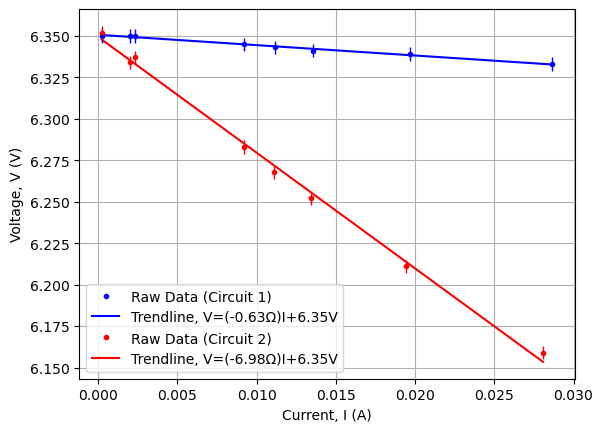

In [4]:
popt1,pcov1=curve_fit(model1,current_1,voltage_1,sigma=voltage_uncertainty_1,absolute_sigma=True)
popt2,pcov2=curve_fit(model1,current_2,voltage_2,sigma=voltage_uncertainty_2,absolute_sigma=True)
plt.plot(current_1,voltage_1,marker='.',linewidth=0,color='b',label='Raw Data (Circuit 1)')
plt.plot(current_1,model1(current_1,popt1[0],popt1[1]),color='b',label='Trendline, V=('+str(np.round(popt1[0],2))+'Ω)I+'+str(np.round(popt1[1],2))+'V')
plt.plot(current_2,voltage_2,marker='.',linewidth=0,color='r',label='Raw Data (Circuit 2)')
plt.plot(current_2,model1(current_2,popt2[0],popt2[1]),color='r',label='Trendline, V=('+str(np.round(popt2[0],2))+'Ω)I+'+str(np.round(popt2[1],2))+'V')
plt.errorbar(current_1,voltage_1,yerr=voltage_uncertainty_1,marker='o',ls='',lw=1,color='b',ms=1)
plt.errorbar(current_1,voltage_1,xerr=current_uncertainty_1,marker='o',ls='',lw=1,color='b',ms=1)
plt.errorbar(current_2,voltage_2,yerr=voltage_uncertainty_2,marker='o',ls='',lw=1,color='r',ms=1)
plt.errorbar(current_2,voltage_2,xerr=current_uncertainty_2,marker='o',ls='',lw=1,color='r',ms=1)
plt.xlabel('Current, I (A)')
plt.ylabel('Voltage, V (V)')
plt.grid()
plt.legend()
plt.show()

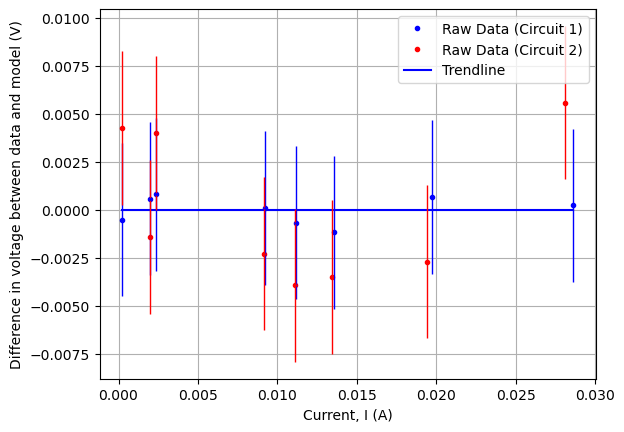

In [5]:
popt1,pcov1=curve_fit(model1,current_1,voltage_1,sigma=voltage_uncertainty_1,absolute_sigma=True)
popt2,pcov2=curve_fit(model1,current_2,voltage_2,sigma=voltage_uncertainty_2,absolute_sigma=True)
plt.plot(current_1,voltage_1-model1(current_1,popt1[0],popt1[1]),marker='.',linewidth=0,color='b',label='Raw Data (Circuit 1)')
plt.plot(current_2,voltage_2-model1(current_2,popt2[0],popt2[1]),marker='.',linewidth=0,color='r',label='Raw Data (Circuit 2)')
plt.plot(current_1,model1(current_1,popt1[0],popt1[1])*0,color='b',label='Trendline')
plt.errorbar(current_1,voltage_1-model1(current_1,popt1[0],popt1[1]),yerr=voltage_uncertainty_1,marker='o',ls='',lw=1,color='b',ms=1)
plt.errorbar(current_2,voltage_2-model1(current_2,popt2[0],popt2[1]),yerr=voltage_uncertainty_2,marker='o',ls='',lw=1,color='r',ms=1)
plt.xlabel('Current, I (A)')
plt.ylabel('Difference in voltage between data and model (V)')
plt.grid()
plt.legend()
plt.show()

In [6]:
print(np.sqrt(pcov1[0,0]))
print(np.sqrt(pcov2[0,0]))

0.15479628424643435
0.15770272717482112


In [7]:
def chisquaredr(yi,fxi,uyi,nparameters):
    return (1/(len(yi)-nparameters))*(np.sum(((yi-fxi)/(uyi))**2))
print(chisquaredr(voltage_1, model1(current_1,popt1[0],popt1[1]), voltage_uncertainty_1, 2))
print(chisquaredr(voltage_2, model1(current_2,popt2[0],popt2[1]), voltage_uncertainty_2, 2))

0.0372694220253615
1.1217953600308381
